<a href="https://colab.research.google.com/github/lucianosilvacraam/astro/blob/master/Astroinform%C3%A1tica_II_Aula_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Tópicos da Aula:** Construção de Modelos, Inicialização, Simulação

In [1]:
!pip install batman-package

  Created wheel for batman-package: filename=batman_package-2.4.6-cp36-cp36m-linux_x86_64.whl size=212652 sha256=9ce8f5ef64851ccf867fcf56cc82f7f629a2977bfb1d593be4cb4496b353133f
  Stored in directory: /root/.cache/pip/wheels/f6/1e/90/3b68a7004b60a358389fe48c9f9f9c0d7293e01ea562f7116f
Successfully built batman-package


**Importação dos Módulos**

In [0]:
import batman
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

**Construção do Modelo de Trânsito**

In [0]:
params = batman.TransitParams()
params.t0 = 0.                       #time of inferior conjunction
params.per = 1218.                      #orbital period
params.rp = 0.1                      #planet radius (in units of stellar radii)
params.a = 2.69                       #semi-major axis (in units of stellar radii)
params.inc = 87.                     #orbital inclination (in degrees)
params.ecc = 0.24                      #eccentricity
params.w = 90.                       #longitude of periastron (in degrees)
params.u = [0.1, 0.3]                #limb darkening coefficients [u1, u2]
params.limb_dark = "quadratic"       #limb darkening model

**Inicialização do Modelo de Trânsito**

In [0]:
t = np.linspace(-100., 100., 100)
m = batman.TransitModel(params, t)

**Simulação do Modelo de Trânsito**

In [0]:
flux = m.light_curve(params)
#print(flux)

**Exibição dos Resultados da Simulação**

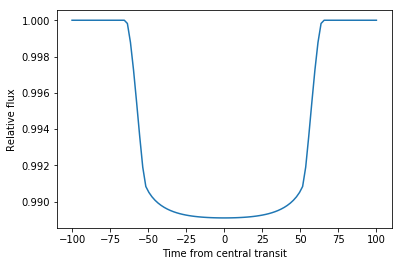

In [14]:
plt.xlabel("Time from central transit")
plt.ylabel("Relative flux")
plt.plot(t, flux)


**Simulação com diferentes raios do planeta**

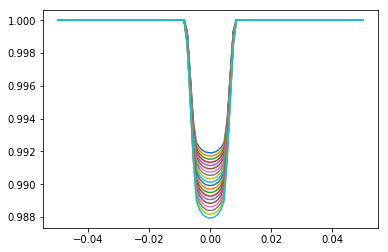

In [15]:
params = batman.TransitParams()       #object to store transit parameters
params.t0 = 0.                        #time of inferior conjunction
params.per = 1.                       #orbital period
params.rp = 0.1                       #planet radius (in units of stellar radii)
params.a = 15.                        #semi-major axis (in units of stellar radii)
params.inc = 87.                      #orbital inclination (in degrees)
params.ecc = 0.                       #eccentricity
params.w = 90.                        #longitude of periastron (in degrees)
params.u = [0.1, 0.3]                #limb darkening coefficients [u1, u2]
params.limb_dark = "quadratic"       #limb darkening model

t = np.linspace(-0.05, 0.05, 100)        #times at which to calculate light curve
m = batman.TransitModel(params, t)    #initializes model

radii = np.linspace(0.09, 0.11, 20)
for r in radii:
        params.rp = r                           #updates planet radius
        flux = m.light_curve(params)            #recalculates light curve
        plt.plot(t,flux)

**Simulação com diferentes escurecimentos de limbo**

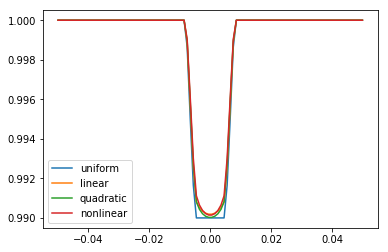

In [17]:
params = batman.TransitParams()       #object to store transit parameters
params.t0 = 0.                        #time of inferior conjunction
params.per = 1.                       #orbital period
params.rp = 0.1                       #planet radius (in units of stellar radii)
params.a = 15.                        #semi-major axis (in units of stellar radii)
params.inc = 87.                      #orbital inclination (in degrees)
params.ecc = 0.                       #eccentricity
params.w = 90.                        #longitude of periastron (in degrees)
params.u = [0.1, 0.3]                #limb darkening coefficients [u1, u2]
params.limb_dark = "quadratic"       #limb darkening model

t = np.linspace(-0.05, 0.05, 100)        #times at which to calculate light curve
m = batman.TransitModel(params, t)    #initializes model

ld_options = ["uniform", "linear", "quadratic", "nonlinear"]
ld_coefficients = [[], [0.3], [0.1, 0.3], [0.5, 0.1, 0.1, -0.1]]


for i in range(4):
        params.limb_dark = ld_options[i]          #specifies the LD profile
        params.u = ld_coefficients[i]             #updates LD coefficients
        m = batman.TransitModel(params, t)        #initializes the model
        flux = m.light_curve(params)              #calculates light curve
        plt.plot(t, flux, label = ld_options[i])
plt.legend()

In [18]:
!pip install ellc

     |████████████████████████████████| 13.7MB 3.8MB/s 
  Created wheel for ellc: filename=ellc-1.8.5-cp36-cp36m-linux_x86_64.whl size=14093057 sha256=35cdecdb0305ce174b19f13e3877ade2169592291c6d8f922bd2d9e0c8ede700
  Stored in directory: /root/.cache/pip/wheels/83/97/04/1f2ecf5f89f894ddf2cf4a70f6bcf216df410376b86f2d0ec9
Successfully built ellc
